In [3]:

# Import the pandas library
import pandas as pd

# Load the Uber dataset
df = pd.read_csv("uber.csv")

# Display the first 5 rows
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,day_of_week,is_peak_hour,is_weekend
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,3,Yes,No
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,4,No,No
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,0,No,No
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,4,Yes,No
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,3,Yes,No


In [5]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


In [6]:
# Structure and size
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())


Shape: (194954, 15)

Columns: ['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'day_of_week', 'is_peak_hour', 'is_weekend']


In [7]:
# Info and nulls
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194954 entries, 0 to 194953
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         194954 non-null  int64  
 1   key                194954 non-null  object 
 2   fare_amount        194954 non-null  float64
 3   pickup_datetime    194954 non-null  object 
 4   pickup_longitude   194954 non-null  float64
 5   pickup_latitude    194954 non-null  float64
 6   dropoff_longitude  194954 non-null  float64
 7   dropoff_latitude   194954 non-null  float64
 8   passenger_count    194954 non-null  int64  
 9   hour               194954 non-null  int64  
 10  day                194954 non-null  int64  
 11  month              194954 non-null  int64  
 12  day_of_week        194954 non-null  int64  
 13  is_peak_hour       194954 non-null  object 
 14  is_weekend         194954 non-null  object 
dtypes: float64(5), int64(6), object(4)
memory usage: 22

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
day_of_week          0
is_peak_hour         0
is_weekend           0
dtype: int64

In [8]:
df.describe()


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,day_of_week
count,1.949540e+05,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000
mean,2.771469e+07,11.336467,-73.975452,40.750782,-73.974497,40.751074,1.689865,13.490690,15.701940,6.285016,3.049263
std,1.600882e+07,9.704470,0.034962,0.027052,0.034942,0.030868,1.305768,6.515844,8.688269,3.440316,1.947010
min,1.000000e+00,0.010000,-74.403080,40.508697,-74.449079,40.510800,1.000000,0.000000,1.000000,1.000000,0.000000
25%,1.383331e+07,6.000000,-73.992277,40.736452,-73.991600,40.735329,1.000000,9.000000,8.000000,3.000000,1.000000
50%,2.776128e+07,8.500000,-73.982116,40.753288,-73.980548,40.753732,1.000000,14.000000,16.000000,6.000000,3.000000
75%,4.154603e+07,12.500000,-73.968391,40.767519,-73.965429,40.768309,2.000000,19.000000,23.000000,9.000000,5.000000
max,5.542357e+07,499.000000,-73.506178,40.991651,-73.515512,40.996788,6.000000,23.000000,31.000000,12.000000,6.000000


In [9]:
df = df.dropna()


In [10]:
# Drop rows with missing fare or datetime
df = df.dropna(subset=['fare_amount', 'pickup_datetime'])


In [11]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract features
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek  # 0=Monday


In [12]:
# Define peak hours (e.g., 7–9 AM and 5–7 PM)
df['is_peak_hour'] = df['hour'].apply(lambda x: 'Yes' if x in [7,8,9,17,18,19] else 'No')

# Weekend flag
df['is_weekend'] = df['day_of_week'].apply(lambda x: 'Yes' if x in [5,6] else 'No')


In [13]:
df.to_csv("uber.csv", index=False)


In [14]:
# Shape: (rows, columns)
print("Dataset Shape:", df.shape)

# Column names
print("\nColumn Names:")
print(df.columns.tolist())

# First few rows
df.head(30)


Dataset Shape: (194954, 15)

Column Names:
['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'day_of_week', 'is_peak_hour', 'is_weekend']


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,day_of_week,is_peak_hour,is_weekend
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,3,Yes,No
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,4,No,No
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,0,No,No
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,4,Yes,No
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,3,Yes,No
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,2,12,2,5,No,Yes
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00+00:00,-73.961447,40.693965,-73.871195,40.774297,5,7,12,10,6,Yes,Yes
7,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00+00:00,-73.975187,40.745767,-74.002720,40.743537,1,9,17,2,4,Yes,No
8,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00+00:00,-74.001065,40.741787,-73.963040,40.775012,1,19,29,3,3,Yes,No
9,2205147,2015-05-22 17:32:27.0000004,6.5,2015-05-22 17:32:27+00:00,-73.974388,40.746952,-73.988586,40.729805,1,17,22,5,4,Yes,No


In [15]:
# Data types
print("\nData Types:")
print(df.dtypes)



Data Types:
Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
hour                               int32
day                                int32
month                              int32
day_of_week                        int32
is_peak_hour                      object
is_weekend                        object
dtype: object


# Variable Descriptions
- pickup_datetime: Timestamp of trip start
- fare_amount: Total fare paid
- pickup_latitude / longitude: Starting coordinates
- dropoff_latitude / longitude: Ending coordinates
- passenger_count: Number of passengers


In [16]:
# Total missing values per column
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
day_of_week          0
is_peak_hour         0
is_weekend           0
dtype: int64


In [17]:
# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())



Duplicate Rows: 0


In [18]:
# Negative fares
print("\nNegative Fares:")
print(df[df['fare_amount'] < 0])

# Passenger count range
print("\nPassenger Count Stats:")
print(df['passenger_count'].describe())



Negative Fares:
Empty DataFrame
Columns: [Unnamed: 0, key, fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, hour, day, month, day_of_week, is_peak_hour, is_weekend]
Index: []

Passenger Count Stats:
count    194954.000000
mean          1.689865
std           1.305768
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64


In [19]:
# Descriptive statistics
df.describe()


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,day_of_week
count,1.949540e+05,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000
mean,2.771469e+07,11.336467,-73.975452,40.750782,-73.974497,40.751074,1.689865,13.490690,15.701940,6.285016,3.049263
std,1.600882e+07,9.704470,0.034962,0.027052,0.034942,0.030868,1.305768,6.515844,8.688269,3.440316,1.947010
min,1.000000e+00,0.010000,-74.403080,40.508697,-74.449079,40.510800,1.000000,0.000000,1.000000,1.000000,0.000000
25%,1.383331e+07,6.000000,-73.992277,40.736452,-73.991600,40.735329,1.000000,9.000000,8.000000,3.000000,1.000000
50%,2.776128e+07,8.500000,-73.982116,40.753288,-73.980548,40.753732,1.000000,14.000000,16.000000,6.000000,3.000000
75%,4.154603e+07,12.500000,-73.968391,40.767519,-73.965429,40.768309,2.000000,19.000000,23.000000,9.000000,5.000000
max,5.542357e+07,499.000000,-73.506178,40.991651,-73.515512,40.996788,6.000000,23.000000,31.000000,12.000000,6.000000


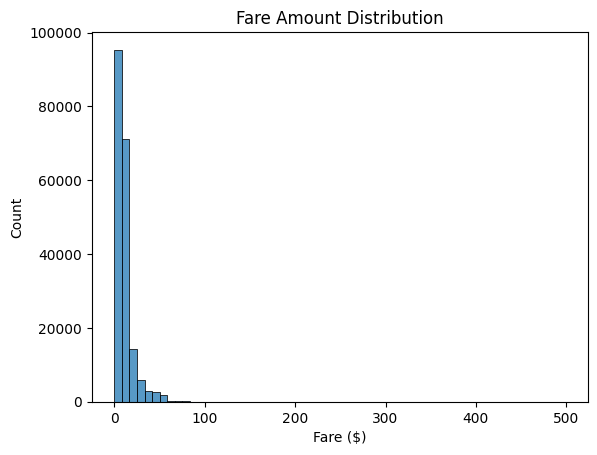

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of fare_amount
sns.histplot(df['fare_amount'], bins=60)
plt.title("Fare Amount Distribution")
plt.xlabel("Fare ($)")
plt.ylabel("Count")
plt.show()


In [21]:
df.isnull().sum()


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
day_of_week          0
is_peak_hour         0
is_weekend           0
dtype: int64

In [22]:
df = df.dropna(subset=['pickup_datetime', 'fare_amount', 'pickup_latitude', 'pickup_longitude'])
df.to_csv("uber_cleaned.csv", index=False)

In [23]:
df = df.dropna()
# Display the first 5 rows after dropping nulls
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,day_of_week,is_peak_hour,is_weekend
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,3,Yes,No
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,4,No,No
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,0,No,No
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,4,Yes,No
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,3,Yes,No


In [24]:
df = df.drop_duplicates()

In [25]:
df = df[df['fare_amount'] > 0]
df = df[df['passenger_count'] > 0]

In [26]:
df = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]
df = df[df['pickup_latitude'].between(-90, 90) & df['pickup_longitude'].between(-180, 180)]

In [27]:
# Reasonable NYC bounding box
df = df[
    (df['pickup_latitude'].between(40.5, 41)) &
    (df['pickup_longitude'].between(-74.5, -73.5)) &
    (df['dropoff_latitude'].between(40.5, 41)) &
    (df['dropoff_longitude'].between(-74.5, -73.5))
]


In [28]:
print("Cleaned shape:", df.shape)
df.isnull().sum()
df.to_csv("uber_cleaned.csv", index=False)

Cleaned shape: (194954, 15)


In [29]:
df.to_csv("uber_cleaned.csv", index=False)


In [30]:
# Export cleaned dataset for Power BI
df.to_csv("uber_cleaned.csv", index=False)

print("Cleaned dataset exported successfully as 'uber_cleaned.csv'")


Cleaned dataset exported successfully as 'uber_cleaned.csv'


In [31]:
# Mean, standard deviation, min, max, quartiles
df.describe()


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,day_of_week
count,1.949540e+05,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000,194954.000000
mean,2.771469e+07,11.336467,-73.975452,40.750782,-73.974497,40.751074,1.689865,13.490690,15.701940,6.285016,3.049263
std,1.600882e+07,9.704470,0.034962,0.027052,0.034942,0.030868,1.305768,6.515844,8.688269,3.440316,1.947010
min,1.000000e+00,0.010000,-74.403080,40.508697,-74.449079,40.510800,1.000000,0.000000,1.000000,1.000000,0.000000
25%,1.383331e+07,6.000000,-73.992277,40.736452,-73.991600,40.735329,1.000000,9.000000,8.000000,3.000000,1.000000
50%,2.776128e+07,8.500000,-73.982116,40.753288,-73.980548,40.753732,1.000000,14.000000,16.000000,6.000000,3.000000
75%,4.154603e+07,12.500000,-73.968391,40.767519,-73.965429,40.768309,2.000000,19.000000,23.000000,9.000000,5.000000
max,5.542357e+07,499.000000,-73.506178,40.991651,-73.515512,40.996788,6.000000,23.000000,31.000000,12.000000,6.000000


In [32]:
# Median
print("Median Fare:", df['fare_amount'].median())
print("Median Passenger Count:", df['passenger_count'].median())

# Mode
print("Most common fare:", df['fare_amount'].mode()[0])
print("Most common pickup hour:", df['pickup_datetime'].dt.hour.mode()[0])


Median Fare: 8.5
Median Passenger Count: 1.0
Most common fare: 6.5
Most common pickup hour: 19


In [33]:
# Calculate range
fare_min = df['fare_amount'].min()
fare_max = df['fare_amount'].max()
fare_range = fare_max - fare_min

print("Fare Range:", fare_range)

# Quartiles
Q1 = df['fare_amount'].quantile(0.25)
Q2 = df['fare_amount'].quantile(0.50)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

print("Q1 (25%):", Q1)
print("Q2 (Median):", Q2)
print("Q3 (75%):", Q3)
print("IQR (Q3 - Q1):", IQR)


Fare Range: 498.99
Q1 (25%): 6.0
Q2 (Median): 8.5
Q3 (75%): 12.5
IQR (Q3 - Q1): 6.5


In [34]:
# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)]
print("Number of Fare Outliers:", outliers.shape[0])

# Show a few outliers
outliers[['fare_amount', 'passenger_count']].head()


Number of Fare Outliers: 16677


,fare_amount,passenger_count
6,24.5,5
28,25.7,4
32,39.5,4
37,29.0,1
46,56.8,1


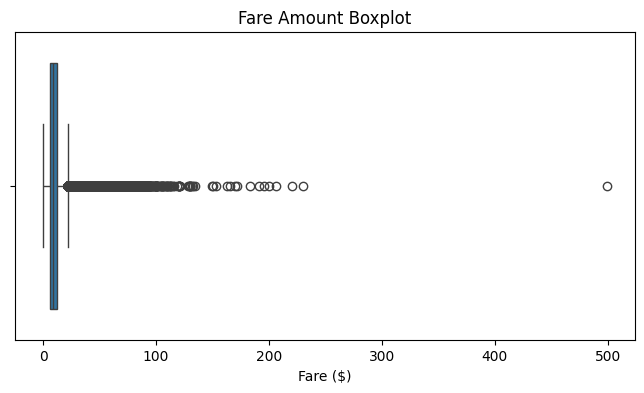

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fare_amount'])
plt.title("Fare Amount Boxplot")
plt.xlabel("Fare ($)")
plt.show()


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set style for nicer visuals
sns.set(style="whitegrid")


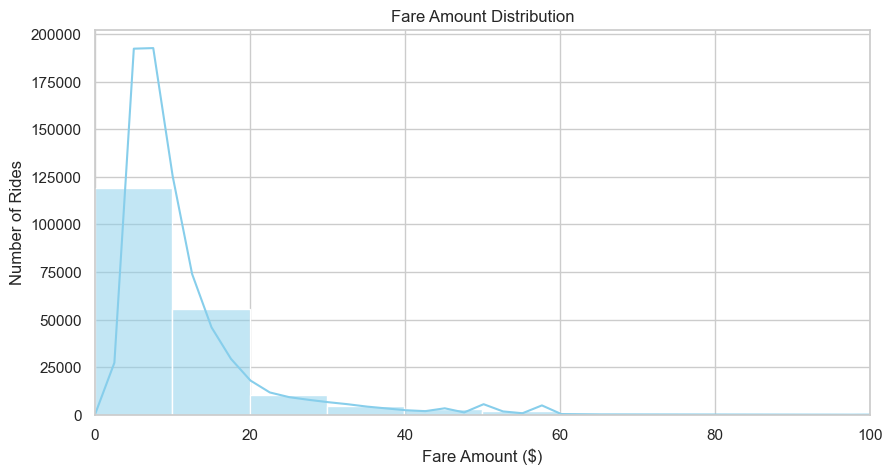

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(df['fare_amount'], bins=50, kde=True, color='skyblue')
plt.title("Fare Amount Distribution")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Number of Rides")
plt.xlim(0, 100)  # Optional: zoom in to exclude huge outliers
plt.show()


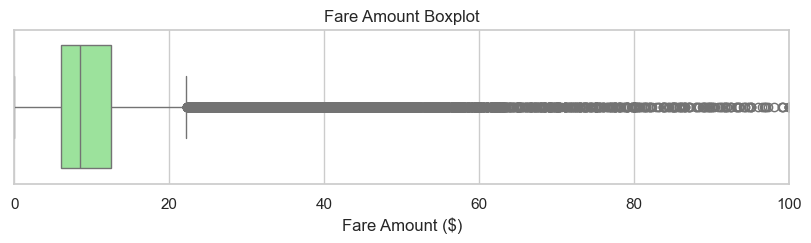

In [38]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['fare_amount'], color='lightgreen')
plt.title("Fare Amount Boxplot")
plt.xlabel("Fare Amount ($)")
plt.xlim(0, 100)  # Optional: zoom in for better view
plt.show()


C:\Users\ndayi\AppData\Local\Temp\ipykernel_14760\3133176128.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='fare_amount', data=df, estimator='mean', palette='viridis')


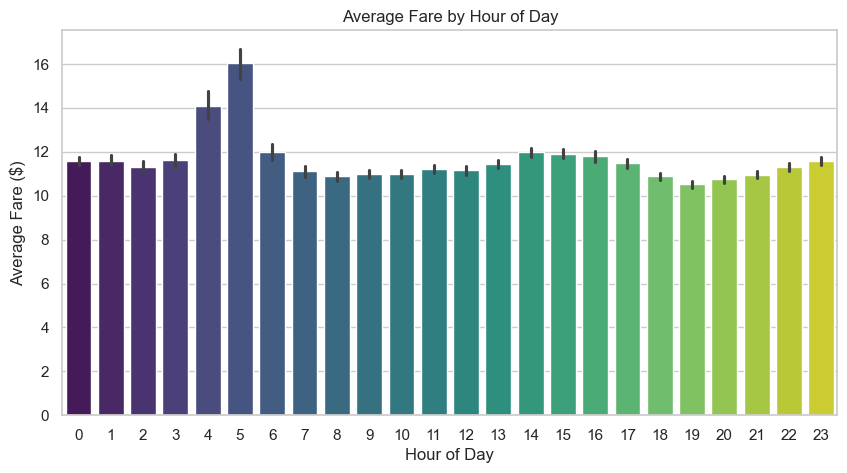

In [39]:
# Create hour column if not already
df['hour'] = df['pickup_datetime'].dt.hour

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='hour', y='fare_amount', data=df, estimator='mean', palette='viridis')
plt.title("Average Fare by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare ($)")
plt.show()


In [40]:
plt.savefig("fare_distribution.png")  # Saves the last plot


<Figure size 640x480 with 0 Axes>

In [ ]:
plt.savefig("fare_distribution.png")  # Saves the last plot
# Export the cleaned dataset as a CSV file for Power BI import
df.to_csv("uber_cleaned.csv", index=False)

<Figure size 640x480 with 0 Axes>

In [51]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

# Apply to each row
df['distance'] = df.apply(lambda row: haversine(
    row['pickup_latitude'], row['pickup_longitude'],
    row['dropoff_latitude'], row['dropoff_longitude']), axis=1)


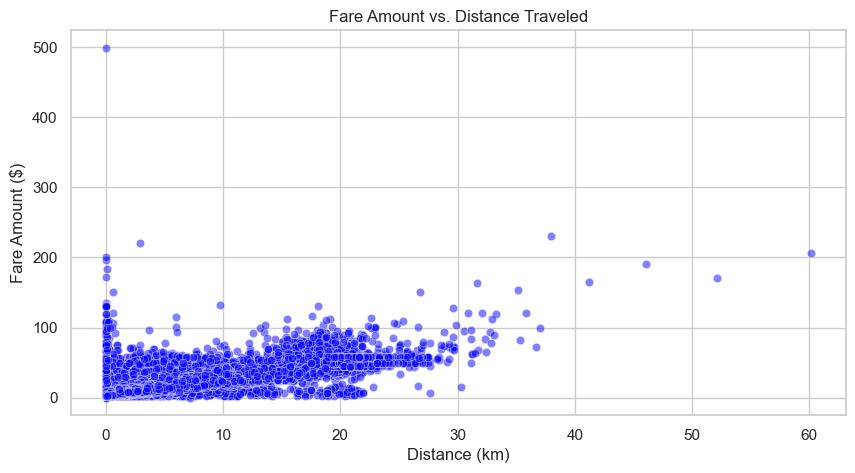

In [54]:
# Scatterplot: Fare vs Distance
plt.figure(figsize=(10, 5))
sns.scatterplot(x='distance', y='fare_amount', data=df, alpha=0.5, color='blue')
plt.title("Fare Amount vs. Distance Traveled")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.show()


C:\Users\ndayi\AppData\Local\Temp\ipykernel_14760\2063889459.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='fare_amount', data=df, estimator='mean', palette='magma')


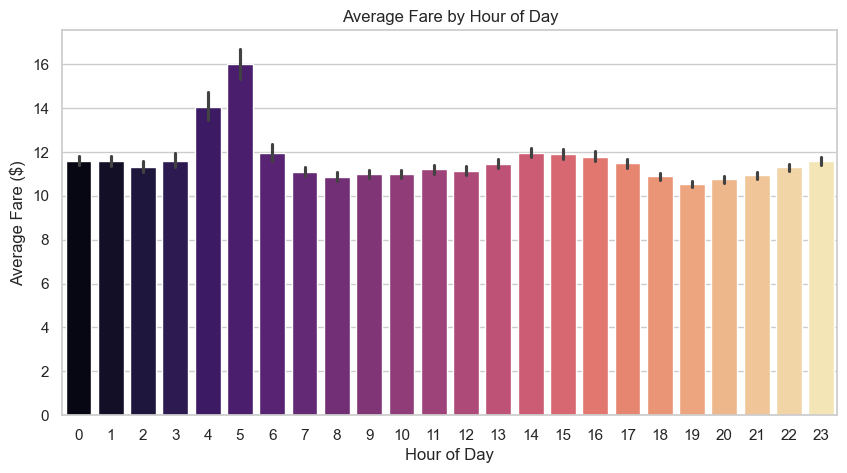

In [55]:
# Bar chart: average fare per hour
plt.figure(figsize=(10, 5))
sns.barplot(x='hour', y='fare_amount', data=df, estimator='mean', palette='magma')
plt.title("Average Fare by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare ($)")
plt.show()


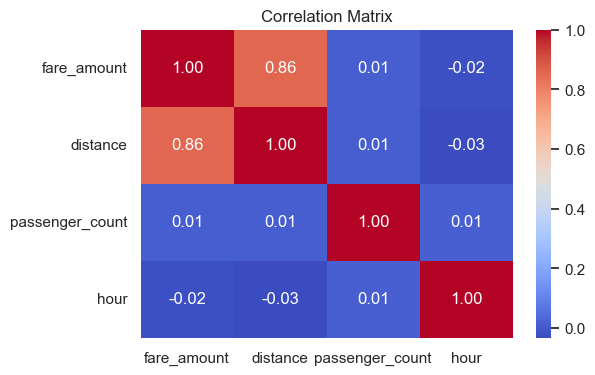

In [56]:
# Select numeric columns for correlation
numeric_cols = df[['fare_amount', 'distance', 'passenger_count', 'hour']]

# Compute correlation matrix
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [57]:
# Ensure the column is in datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])


In [58]:
# Extract datetime components
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month


In [59]:
# 0 = Monday, 6 = Sunday
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

# Optional: Label the days
df['day_name'] = df['pickup_datetime'].dt.day_name()


In [60]:
# Peak hour flag
df['is_peak_hour'] = df['hour'].apply(lambda x: 'Yes' if x in [7, 8, 9, 17, 18, 19] else 'No')


In [61]:
# Weekend flag (Saturday=5, Sunday=6)
df['is_weekend'] = df['day_of_week'].apply(lambda x: 'Yes' if x >= 5 else 'No')


In [63]:
df[['pickup_datetime', 'hour', 'day', 'month', 'day_name', 'is_peak_hour', 'is_weekend']].head(10)


,pickup_datetime,hour,day,month,day_name,is_peak_hour,is_weekend
0,2015-05-07 19:52:06+00:00,19,7,5,Thursday,Yes,No
1,2009-07-17 20:04:56+00:00,20,17,7,Friday,No,No
2,2009-08-24 21:45:00+00:00,21,24,8,Monday,No,No
3,2009-06-26 08:22:21+00:00,8,26,6,Friday,Yes,No
4,2014-08-28 17:47:00+00:00,17,28,8,Thursday,Yes,No
5,2011-02-12 02:27:09+00:00,2,12,2,Saturday,No,Yes
6,2014-10-12 07:04:00+00:00,7,12,10,Sunday,Yes,Yes
7,2012-02-17 09:32:00+00:00,9,17,2,Friday,Yes,No
8,2012-03-29 19:06:00+00:00,19,29,3,Thursday,Yes,No
9,2015-05-22 17:32:27+00:00,17,22,5,Friday,Yes,No


In [64]:
df.to_csv("uber_enhanced.csv", index=False)
print("Enhanced dataset exported as 'uber_enhanced.csv'")


Enhanced dataset exported as 'uber_enhanced.csv'


In [65]:
df.dtypes


Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
hour                               int32
day                                int32
month                              int32
day_of_week                        int32
is_peak_hour                      object
is_weekend                        object
distance                         float64
day_name                          object
dtype: object

In [66]:
# Encode Yes/No as 1/0
df['is_peak_hour'] = df['is_peak_hour'].map({'Yes': 1, 'No': 0})
df['is_weekend'] = df['is_weekend'].map({'Yes': 1, 'No': 0})


In [67]:
# Order days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = pd.Categorical(df['day_name'], categories=day_order, ordered=True)
df.to_csv("uber_enhanced.csv", index=False)
print("Enhanced dataset exported as 'uber_enhanced.csv'")  # Confirmation message

Enhanced dataset exported as 'uber_enhanced.csv'


In [68]:
df.to_csv("uber_final_cleaned.csv", index=False)
print("Final dataset with encoded features saved as 'uber_final_cleaned.csv'")


Final dataset with encoded features saved as 'uber_final_cleaned.csv'


In [69]:
# Save the final enhanced dataset
df.to_csv("uber_final_cleaned.csv", index=False)

print("Enhanced dataset saved as 'uber_final_cleaned.csv' for Power BI import.")


Enhanced dataset saved as 'uber_final_cleaned.csv' for Power BI import.


In [70]:
import numpy as np


In [71]:
# Define weather categories
weather_conditions = ['Clear', 'Rain', 'Snow']

# Simulate weather with weighted probabilities
df['weather'] = np.random.choice(weather_conditions, size=len(df), p=[0.7, 0.25, 0.05])


In [73]:
df[['pickup_datetime', 'fare_amount', 'weather']].head(11)

,pickup_datetime,fare_amount,weather
0,2015-05-07 19:52:06+00:00,7.5,Rain
1,2009-07-17 20:04:56+00:00,7.7,Snow
2,2009-08-24 21:45:00+00:00,12.9,Rain
3,2009-06-26 08:22:21+00:00,5.3,Clear
4,2014-08-28 17:47:00+00:00,16.0,Rain
5,2011-02-12 02:27:09+00:00,4.9,Rain
6,2014-10-12 07:04:00+00:00,24.5,Clear
7,2012-02-17 09:32:00+00:00,9.7,Clear
8,2012-03-29 19:06:00+00:00,12.5,Clear
9,2015-05-22 17:32:27+00:00,6.5,Clear


In [74]:
df.to_csv("uber_with_weather.csv", index=False)
print("Exported dataset with simulated weather: 'uber_with_weather.csv'")


Exported dataset with simulated weather: 'uber_with_weather.csv'


In [75]:
total_rides = df.shape[0]
print("Total Uber rides:", total_rides)


Total Uber rides: 194954


In [76]:
# By hour
df['hour'].value_counts().sort_index()

# By weather condition
df['weather'].value_counts()

# Grouped summary
df.groupby('weather')['fare_amount'].count()


weather
Clear    136354
Rain      48755
Snow       9845
Name: fare_amount, dtype: int64